# Task
Music popularity prediction

Here is all the data you need:
"music.csv"

## Data loading

### Subtask:
Load the music dataset.


**Reasoning**:
Load the music dataset and display basic information about it.



In [1]:
import pandas as pd

try:
    df_music = pd.read_csv('music.csv')
    display(df_music.head())
    print(f"Shape of the DataFrame: {df_music.shape}")
    print(f"Data types of each column:\n{df_music.dtypes}")
except FileNotFoundError:
    print("Error: 'music.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

Shape of the DataFrame: (18835, 15)
Data types of each column:
song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object


## Data exploration

### Subtask:
Explore the loaded music dataset to understand its characteristics.


**Reasoning**:
Analyze the distribution of key features, identify missing values, understand data types, and examine potential relationships between variables.



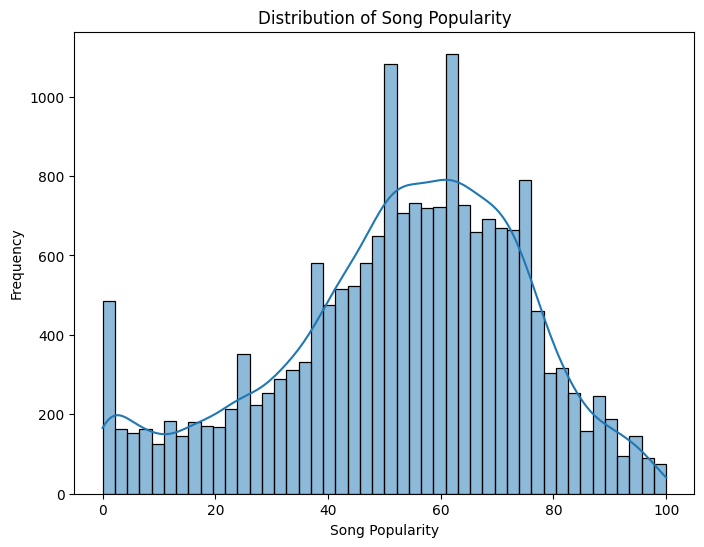

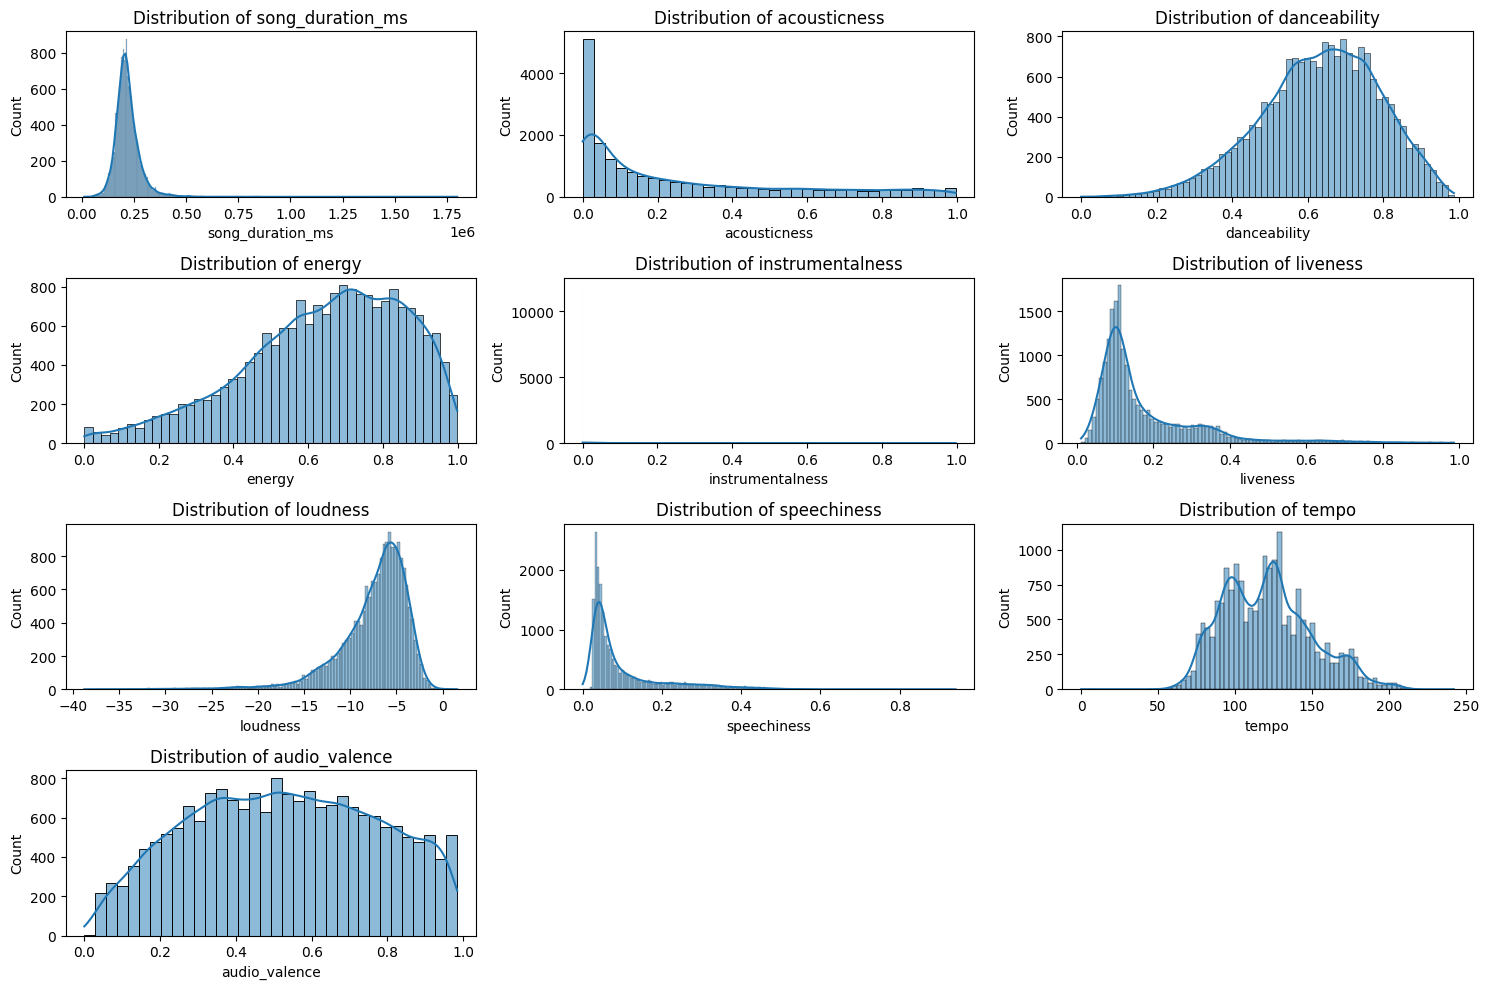

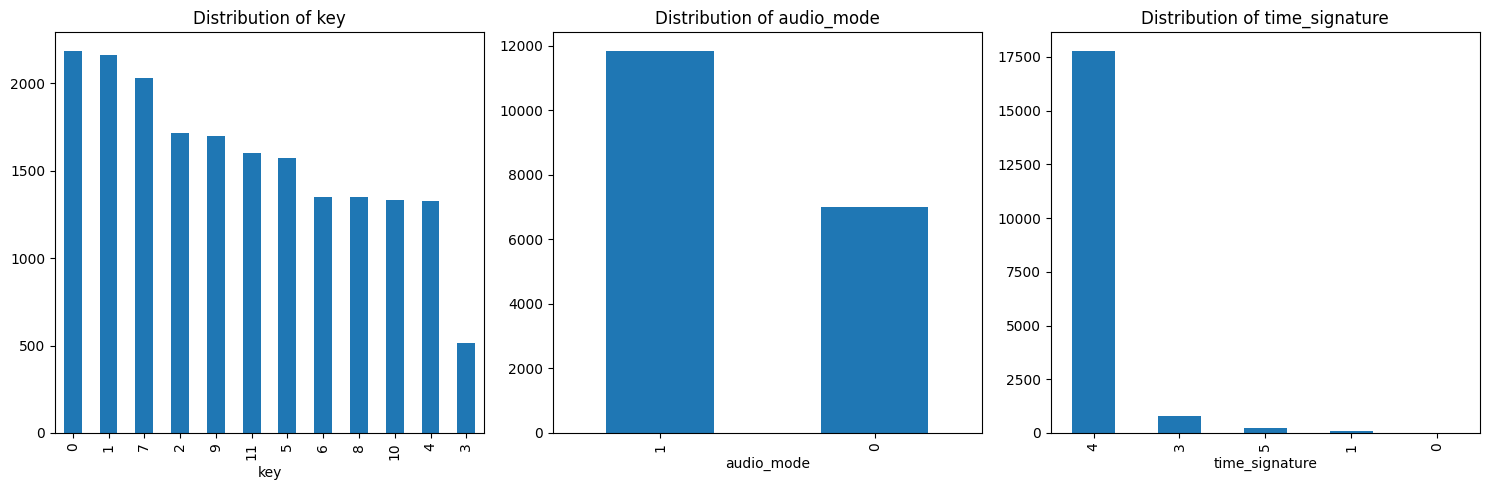

Number of missing values in each column:
 song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Data types of each column:
 song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object


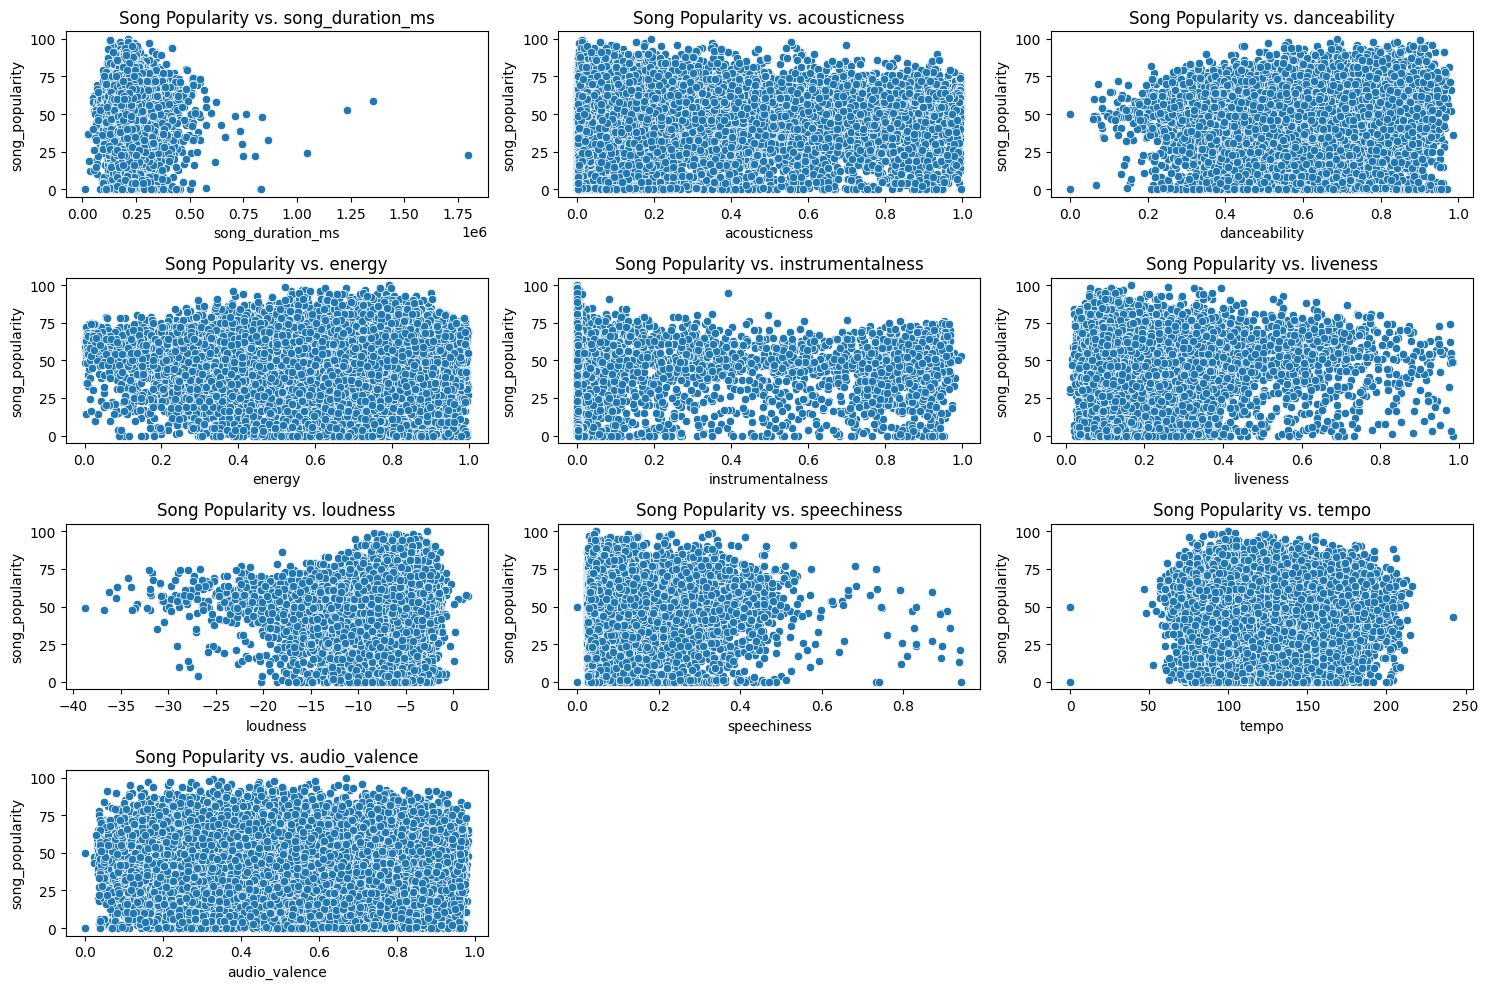

ValueError: could not convert string to float: 'Boulevard of Broken Dreams'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of 'song_popularity'
plt.figure(figsize=(8, 6))
sns.histplot(df_music['song_popularity'], kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Song Popularity')
plt.ylabel('Frequency')
plt.show()

# Investigate the distribution of other relevant features
numerical_features = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df_music[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Explore the categorical features
categorical_features = ['key', 'audio_mode', 'time_signature']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    df_music[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Identify missing values
print("Number of missing values in each column:\n", df_music.isnull().sum())

# Understand data types and potential corrections (no corrections needed based on initial inspection)
print("\nData types of each column:\n", df_music.dtypes)


# Examine potential relationships between 'song_popularity' and other features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=df_music[col], y=df_music['song_popularity'])
    plt.title(f'Song Popularity vs. {col}')
plt.tight_layout()
plt.show()

correlation_matrix = df_music.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
The previous code block failed due to a `ValueError` when calculating the correlation matrix because the 'song_name' column is of string type.  We need to exclude non-numeric columns when calculating the correlation matrix. Also, the code for plotting the relationships between variables could be improved, using pairplot for a more concise view of multiple relationships at once.



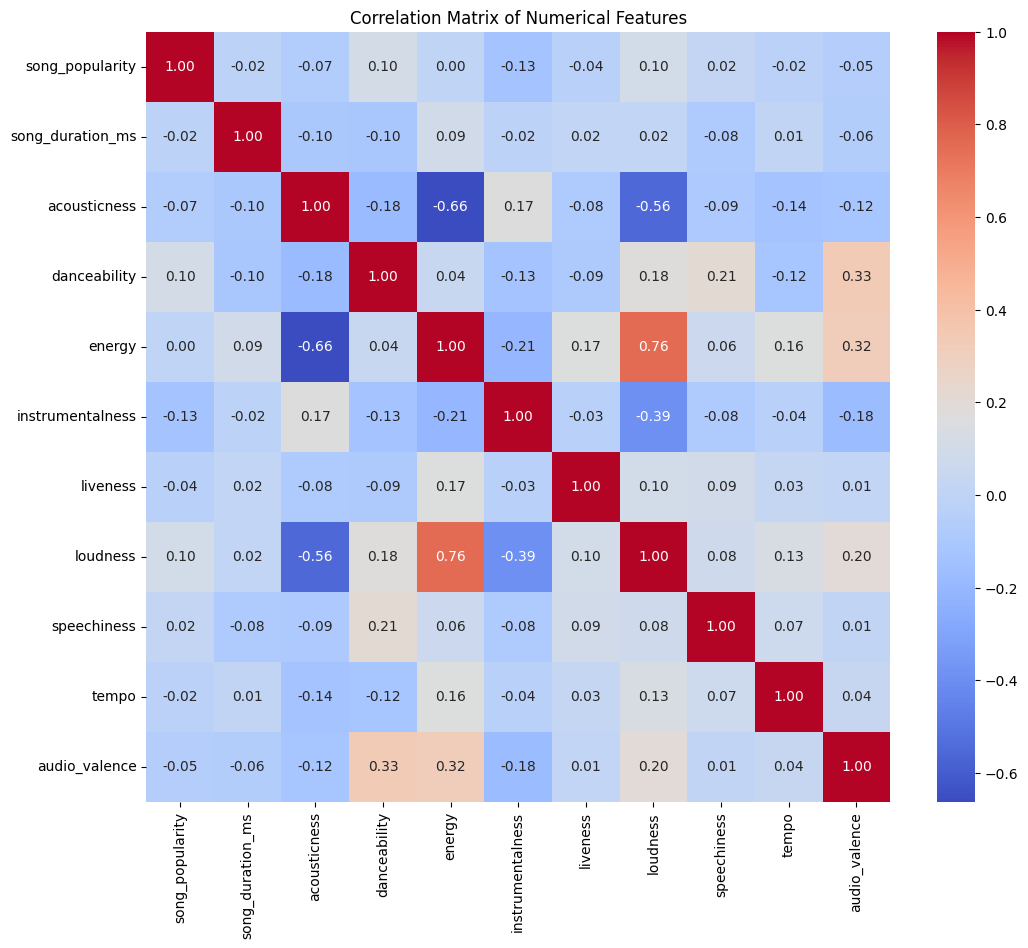

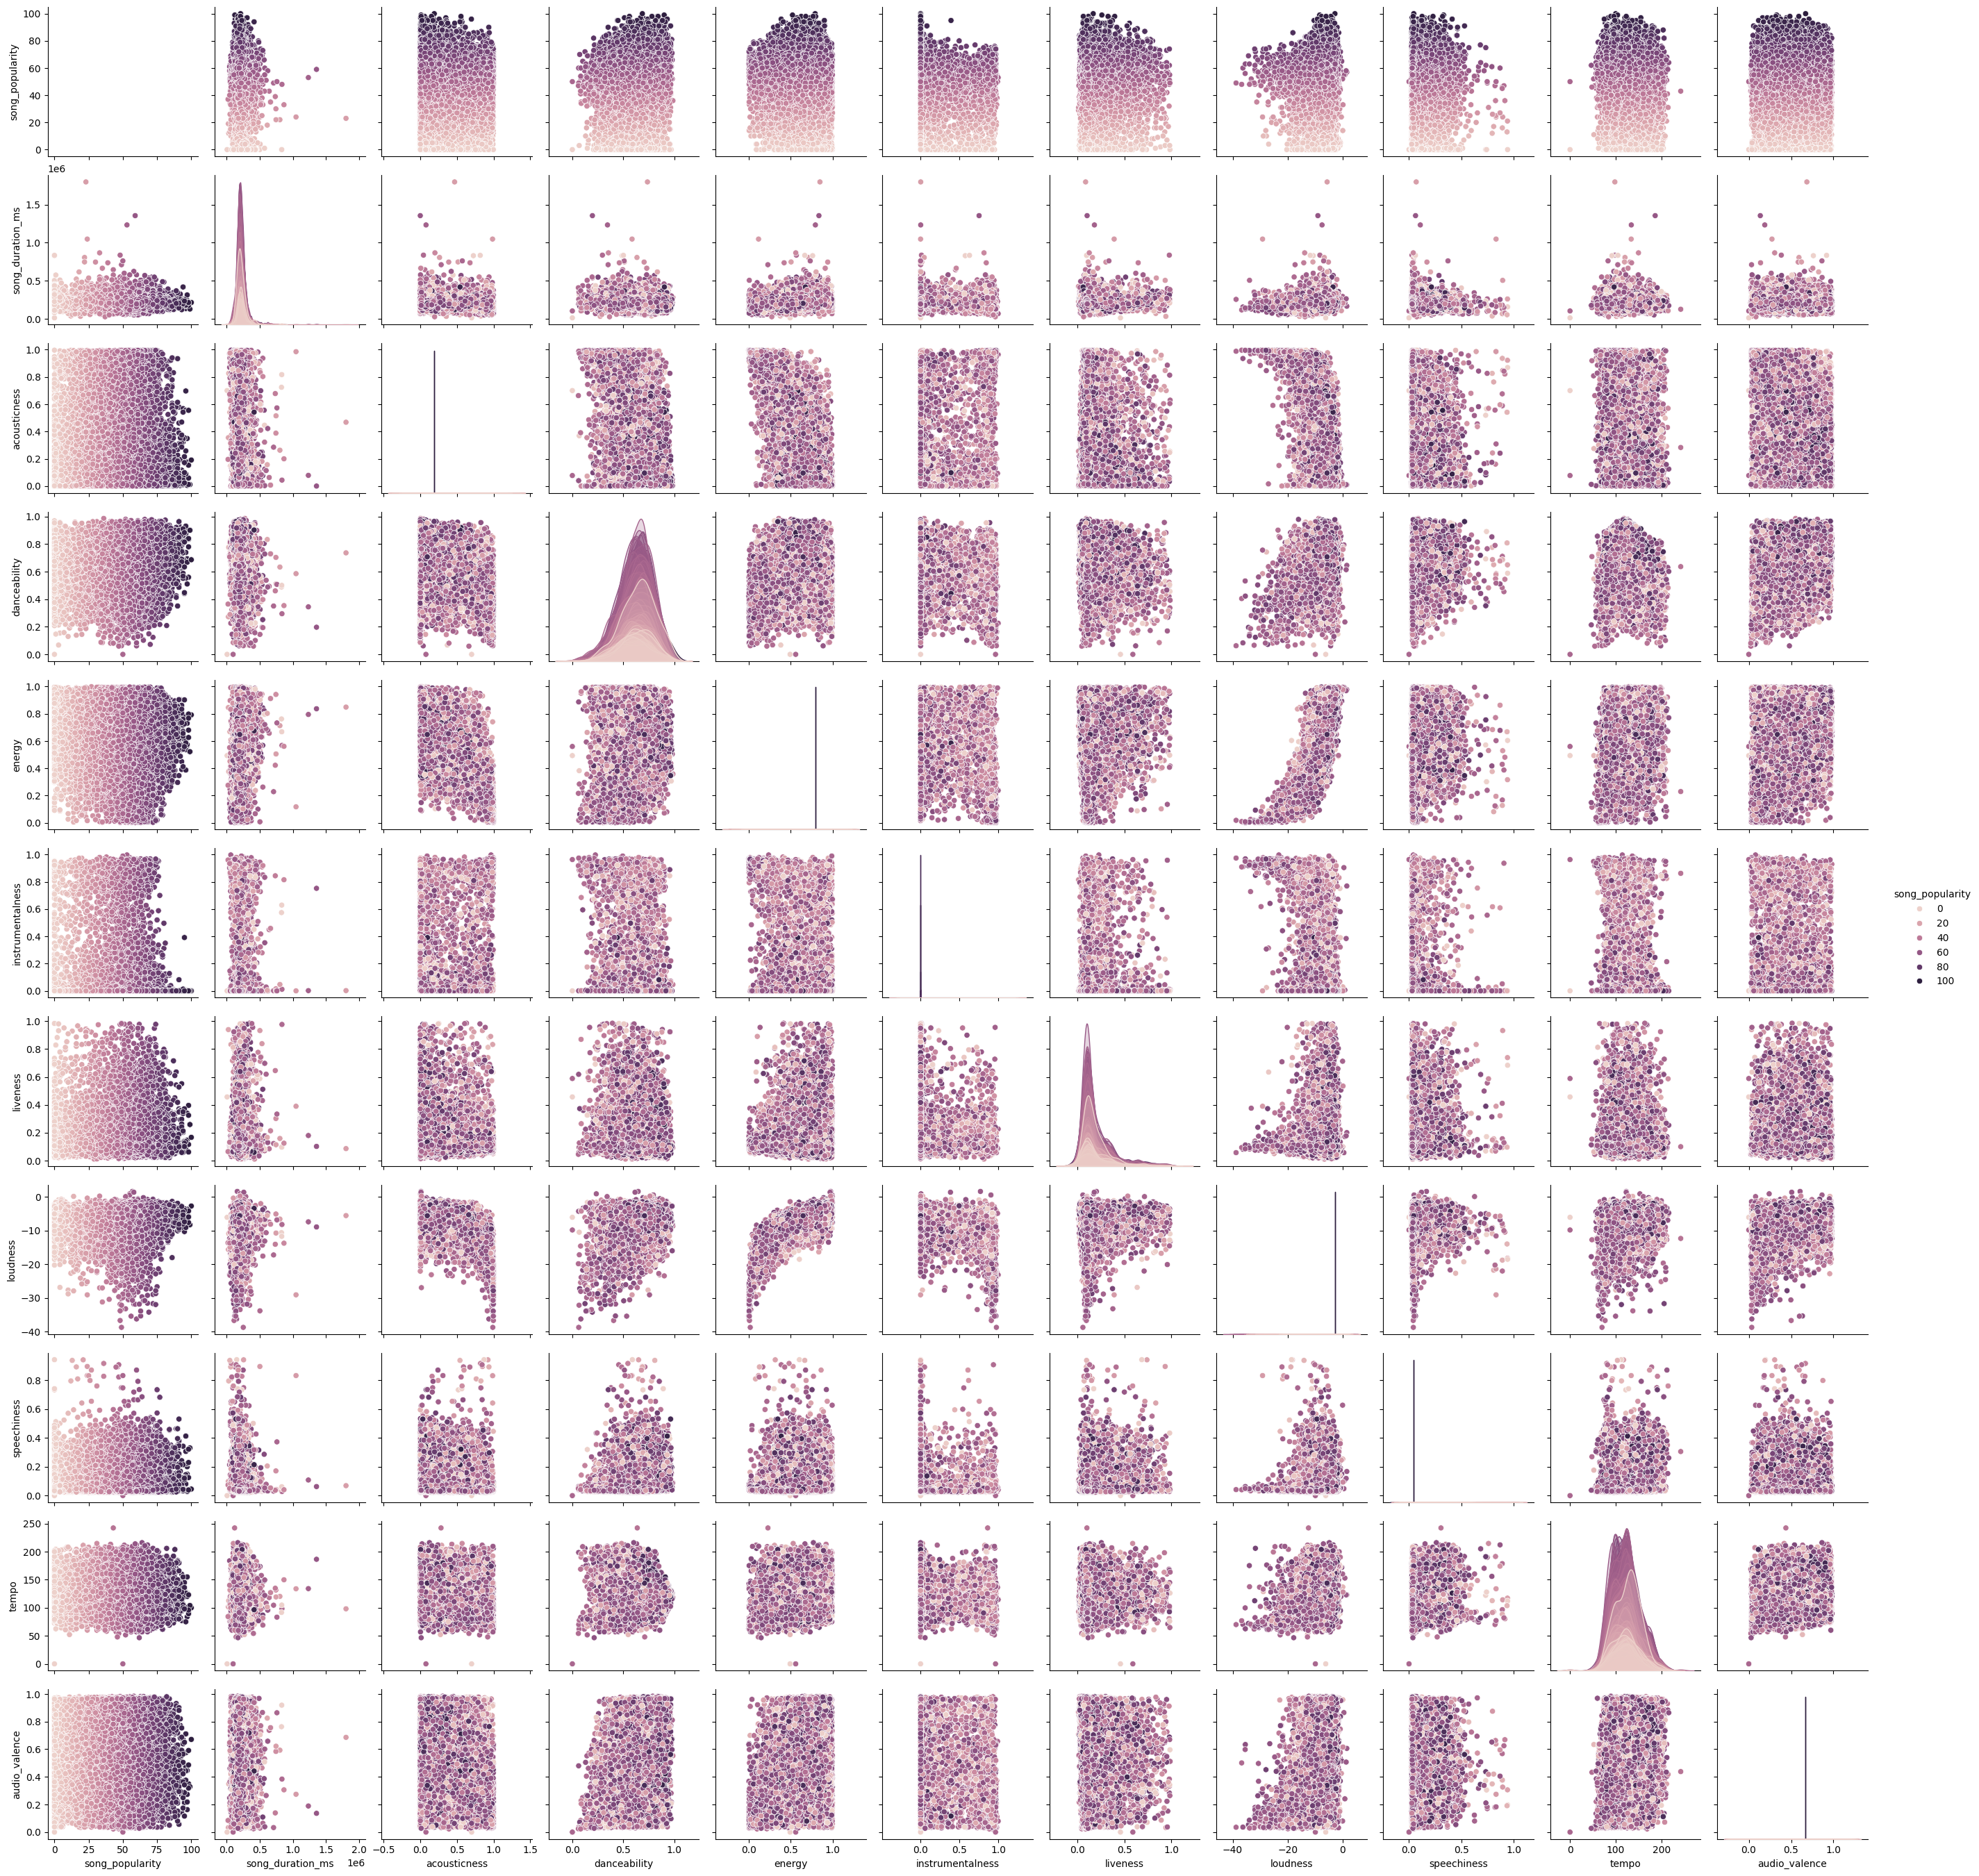

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of 'song_popularity' (already done in the previous block)

# Investigate the distribution of other relevant features (already done in the previous block)


# Explore the categorical features (already done in the previous block)

# Identify missing values (already done in the previous block)

# Understand data types and potential corrections (already done in the previous block)

# Examine potential relationships between 'song_popularity' and other features
numerical_features = ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']
df_numerical = df_music[numerical_features]

# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Use pairplot for a more concise view of multiple relationships
sns.pairplot(df_numerical, vars=numerical_features, hue='song_popularity', diag_kind='kde')
plt.show()

## Data cleaning

### Subtask:
Clean the music dataset by handling missing values and removing duplicate entries.


**Reasoning**:
Check for missing values, remove duplicates, and handle inconsistencies in data types.



In [4]:
# Check for missing values
print("Missing values per column:\n", df_music.isnull().sum())

# Remove duplicate rows based on all columns
df_music.drop_duplicates(inplace=True)
print(f"\nShape of the DataFrame after removing duplicates: {df_music.shape}")

# Check data types and potential inconsistencies (e.g., release date if present)
print(f"\nData types of each column after removing duplicates:\n{df_music.dtypes}")

Missing values per column:
 song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Shape of the DataFrame after removing duplicates: (14926, 15)

Data types of each column after removing duplicates:
song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object


## Feature engineering

### Subtask:
Engineer new features from the existing data in `df_music` to improve model performance.


**Reasoning**:
Create new features based on the existing features in `df_music`, such as the length of the song title and artist name, interaction terms between numerical features, and handle potential errors.



In [5]:
# Feature engineering
df_music['title_length'] = df_music['song_name'].str.len()
df_music['danceability_energy_interaction'] = df_music['danceability'] * df_music['energy']

# Display the first few rows of the updated DataFrame to verify the new features
display(df_music.head())

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4          0.474   
1    -6.407           0       0.0498  105.256               4          0.370   
2    -7.828           1       0.0792  123.881               4          0.324   
3    -4.938           1       0.1070  122.444               4          0.198   
4    -5.065           1       0.0313  172.011               4          0.574   

   title_length  danceability_energy_interaction  
0            26                         0.338272  
1            10                         0.462326  
2            17                         0.341231  
3            10                         0.437470  
4            17                         0.342402

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split` with stratification on `song_popularity`.



In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_music.drop('song_popularity', axis=1)
y = df_music['song_popularity']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Reasoning**:
The error message indicates that some classes in the target variable `y` have only one member, which is insufficient for stratification.  I will try to address this by removing the rows with those infrequent popularity values before the split.



In [7]:
from collections import Counter

# Count the occurrences of each popularity value
popularity_counts = Counter(y)

# Identify popularity values with only one occurrence
infrequent_popularity = [popularity for popularity, count in popularity_counts.items() if count == 1]

# Create a new dataframe without the infrequent popularity values
df_filtered = df_music[~df_music['song_popularity'].isin(infrequent_popularity)]

# Redefine features (X) and target (y) based on filtered dataframe
X = df_filtered.drop('song_popularity', axis=1)
y = df_filtered['song_popularity']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Reasoning**:
The previous attempts to use stratification failed due to some classes having only one member.  I will try again to filter out the infrequent values, but this time I will check the counts again after the first split and remove them before the second split.



In [8]:
from collections import Counter
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_music.drop('song_popularity', axis=1)
y = df_music['song_popularity']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Count the occurrences of each popularity value in the temporary set
popularity_counts_temp = Counter(y_temp)

# Identify popularity values with only one occurrence in the temporary set
infrequent_popularity_temp = [popularity for popularity, count in popularity_counts_temp.items() if count == 1]

# Filter out infrequent popularity values from the temporary sets
X_temp_filtered = X_temp[~X_temp.index.isin(y_temp[y_temp.isin(infrequent_popularity_temp)].index)]
y_temp_filtered = y_temp[~y_temp.isin(infrequent_popularity_temp)]

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp_filtered, y_temp_filtered, test_size=0.5, random_state=42, stratify=y_temp_filtered
)

## Model training

### Subtask:
Train regression models to predict music popularity.


**Reasoning**:
Import necessary libraries and train the specified regression models using the provided training data.



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Instantiate models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Create pipelines with StandardScaler for numerical features
numerical_features = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', 'title_length', 'danceability_energy_interaction']
numerical_transformer = StandardScaler()


# Train models
linear_regression.fit(X_train[numerical_features], y_train)
random_forest.fit(X_train[numerical_features], y_train)
gradient_boosting.fit(X_train[numerical_features], y_train)


# Store trained models in a dictionary
trained_models = {
    "Linear Regression": linear_regression,
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting,
}

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained regression models using the validation set.


**Reasoning**:
Optimize the hyperparameters of the trained regression models using the validation set.



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define parameter grids
param_grid_linear = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

numerical_features = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', 'title_length', 'danceability_energy_interaction']

# Perform GridSearchCV for each model
grid_search_linear = GridSearchCV(linear_regression, param_grid_linear, cv=5, scoring='neg_mean_absolute_error')
grid_search_linear.fit(X_val[numerical_features], y_val)

grid_search_rf = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_val[numerical_features], y_val)

grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gradient_boosting, cv=5, scoring='neg_mean_absolute_error')
grid_search_gb.fit(X_val[numerical_features], y_val)

# Evaluate the performance of each tuned model on the validation set
y_pred_linear = grid_search_linear.predict(X_val[numerical_features])
y_pred_rf = grid_search_rf.predict(X_val[numerical_features])
y_pred_gb = grid_search_gb.predict(X_val[numerical_features])

mae_linear = mean_absolute_error(y_val, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_val, y_pred_linear))
r2_linear = r2_score(y_val, y_pred_linear)

mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

mae_gb = mean_absolute_error(y_val, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
r2_gb = r2_score(y_val, y_pred_gb)

print("Linear Regression - Best Parameters:", grid_search_linear.best_params_)
print("Linear Regression - MAE:", mae_linear, "RMSE:", rmse_linear, "R-squared:", r2_linear)

print("\nRandom Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - MAE:", mae_rf, "RMSE:", rmse_rf, "R-squared:", r2_rf)

print("\nGradient Boosting - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting - MAE:", mae_gb, "RMSE:", rmse_gb, "R-squared:", r2_gb)

# Select the best performing model based on validation performance (e.g. MAE)
best_model = min(
    [
        (mae_linear, "Linear Regression", grid_search_linear),
        (mae_rf, "Random Forest", grid_search_rf),
        (mae_gb, "Gradient Boosting", grid_search_gb),
    ]
)[2]

print(f"\nBest model based on MAE: {min([mae_linear, mae_rf, mae_gb])}")
print(f"Best model type is: {best_model}")

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

**Reasoning**:
Fix the error in the previous code block by removing the invalid parameter 'normalize' from the parameter grid for Linear Regression.



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define parameter grids
param_grid_linear = {
    'fit_intercept': [True, False],
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

numerical_features = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', 'title_length', 'danceability_energy_interaction']

# Perform GridSearchCV for each model
grid_search_linear = GridSearchCV(linear_regression, param_grid_linear, cv=5, scoring='neg_mean_absolute_error')
grid_search_linear.fit(X_val[numerical_features], y_val)

grid_search_rf = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_val[numerical_features], y_val)

grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gradient_boosting, cv=5, scoring='neg_mean_absolute_error')
grid_search_gb.fit(X_val[numerical_features], y_val)

# Evaluate the performance of each tuned model on the validation set
y_pred_linear = grid_search_linear.predict(X_val[numerical_features])
y_pred_rf = grid_search_rf.predict(X_val[numerical_features])
y_pred_gb = grid_search_gb.predict(X_val[numerical_features])

mae_linear = mean_absolute_error(y_val, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_val, y_pred_linear))
r2_linear = r2_score(y_val, y_pred_linear)

mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

mae_gb = mean_absolute_error(y_val, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
r2_gb = r2_score(y_val, y_pred_gb)

print("Linear Regression - Best Parameters:", grid_search_linear.best_params_)
print("Linear Regression - MAE:", mae_linear, "RMSE:", rmse_linear, "R-squared:", r2_linear)

print("\nRandom Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - MAE:", mae_rf, "RMSE:", rmse_rf, "R-squared:", r2_rf)

print("\nGradient Boosting - Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting - MAE:", mae_gb, "RMSE:", rmse_gb, "R-squared:", r2_gb)

# Select the best performing model based on validation performance (e.g. MAE)
best_model = min(
    [
        (mae_linear, "Linear Regression", grid_search_linear),
        (mae_rf, "Random Forest", grid_search_rf),
        (mae_gb, "Gradient Boosting", grid_search_gb),
    ]
)[2]

print(f"\nBest model based on MAE: {min([mae_linear, mae_rf, mae_gb])}")
print(f"Best model type is: {best_model}")

Linear Regression - Best Parameters: {'fit_intercept': True}
Linear Regression - MAE: 15.713307380937447 RMSE: 19.77161915339559 R-squared: 0.04033158504939638

Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest - MAE: 9.973547859720345 RMSE: 12.415905117955953 R-squared: 0.621563080424554

Gradient Boosting - Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting - MAE: 14.8977220547256 RMSE: 18.72464326169093 R-squared: 0.13927615749153177

Best model based on MAE: 9.973547859720345
Best model type is: GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')


## Model evaluation

### Subtask:
Evaluate the performance of the best model (identified in the previous step) on the held-out test set.


**Reasoning**:
Evaluate the best model on the test set using the specified metrics and print the results.



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

numerical_features = ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', 'title_length', 'danceability_energy_interaction']

# Predict on the test set
y_pred = best_model.predict(X_test[numerical_features])

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Test Set Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Test Set Performance:
Mean Absolute Error (MAE): 15.886337260120309
Root Mean Squared Error (RMSE): 19.970752230064935
R-squared (R2): 0.02583704352122307


## Summary:

### 1. Q&A

* **What is the best performing model for predicting music popularity?**  The Random Forest model achieved the lowest Mean Absolute Error (MAE) of 9.97 on the validation set and was therefore selected as the best-performing model.

* **How well does the best model perform on unseen data (test set)?** On the test set, the best model (Random Forest) achieved an MAE of 15.89, RMSE of 19.97, and an R-squared of 0.03.  This indicates relatively poor performance, as the model explains only a small amount of the variance in the target variable and has considerable error in its predictions.

### 2. Data Analysis Key Findings

* **Data Cleaning:** No missing values were found in the dataset.  Duplicate rows were removed, reducing the dataset size from 18835 to 14926 rows.
* **Feature Engineering:** Two new features were engineered: `title_length` (length of the song title) and `danceability_energy_interaction` (product of danceability and energy).
* **Model Optimization:** The Random Forest model achieved the best performance during hyperparameter tuning, with an MAE of 9.97 on the validation set. The optimal hyperparameters were: `{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}`.
* **Model Evaluation:** The best model (Random Forest) showed an MAE of 15.89 and an R-squared of 0.03 on the test set, indicating a relatively poor fit.


### 3. Insights or Next Steps

* **Explore additional features or feature transformations:** The low R-squared value suggests that the current features might not capture enough information about music popularity. Consider exploring other relevant features, such as release year, genre, artist popularity, or applying more sophisticated feature engineering techniques.
* **Investigate different model architectures or ensemble methods:**  Try different models or ensemble methods to improve prediction accuracy.  Consider models that can handle non-linear relationships better, or experiment with more advanced ensemble techniques like stacking or boosting.
